# Numerično integriranje

## Uvod

V okviru tega poglavja bomo za dano funkcijo $f(x)$ izračunali določen integral:

$$\int_a^b\,f(x)\,\textrm{d}x$$

kjer sta $a$ in $b$ meji integriranja, $f(x)$ pa so vrednosti funkcije, ki jih pridobimo iz tabele vrednosti ali s pomočjo analitične funkcije.

Pri numeričnem integriranju integral ocenimo z $I$ in velja

$$\int_a^b\,f(x)\,\textrm{d}x= I + E,$$

kjer je $E$ napaka ocene integrala.

Numerični integral bomo računali na podlagi diskretne vsote:

$$I=\sum_{i=0}^{m}A_i\,f(x_i),$$

kjer so $A_i$ uteži, $x_i$ pa vozlišča na intervalu $[a, b]$ in je $m+1$ število vozlišč.

Ogledali si bomo dva različna pristopa k numerični integraciji:

1. *Newton-Cotesov pristop*, ki temelji na ekvidistantnih vozliščih (konstanten korak integracije) in 
2. *Gaussov integracijski pristop*, kjer so vozlišča postavljena tako, da se doseže natančnost za polinome.

### Motivacijski primer

Pri numeričnem integriranju si bomo pomagali s konkretnim primerom:

$$\int_1^2 x\,\sin(x)\,\textrm{d}x$$

Pripravimo si vozlišča. Osnovni korak naj bo $h=0.25$, v tem primeru imamo štiri podintervale in pet vozlišč, pri koraku $2h$ so tri vozliščne točke in pri koraku $4h$ samo dve (skrajni):

In [45]:
import numpy as np
xg, hg = np.linspace(1, 2, 100, retstep=True) # goste točke (za prikaz)
x2v, h2v = np.linspace(1, 2, 2, retstep=True)  # korak h2v = 1 (2 vozlišči)
x3v, h3v = np.linspace(1, 2, 3, retstep=True)  # korak h3v = 0.5 (3 vozlišča)
x4v, h4v = np.linspace(1, 2, 4, retstep=True)  # korak h4v = 0.33.. (4 vozlišča)
x5v, h5v = np.linspace(1, 2, 5, retstep=True)  # korak h5v = 0.25 (5 vozlišč)

Pripravimo še funkcijske vrednosti:

In [46]:
yg = xg * np.sin(xg)
y2v = x2v * np.sin(x2v)
y3v = x3v * np.sin(x3v)
y4v = x4v * np.sin(x4v)
y5v = x5v * np.sin(x5v)

Pripravimo prikaz podatkov:

In [47]:
import matplotlib.pyplot as plt
from matplotlib import rc # to uvozimo, da so fonti na sliki latex ustrezni
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
%matplotlib inline
def fig_motivacija():
    plt.fill_between(xg, yg, alpha=0.25, facecolor='r')
    plt.annotate(r'$\int_1^2\,x\,\sin(x)\,\textrm{d}x$', (1.3, 0.5), fontsize=22)
    plt.plot(xg, yg, lw=3, alpha=0.5, label=r'$x\,\sin(x)$')
    plt.plot(x2v, y2v, 's', alpha=0.5, label=f'$h={h2v}$', markersize=14)
    plt.plot(x3v, y3v, 'o', alpha=0.5, label=f'$h={h3v}$', markersize=10)
    plt.legend(loc=(1.01, 0))
    plt.ylim(0, 2)
    plt.show()

Prikažimo podatke:

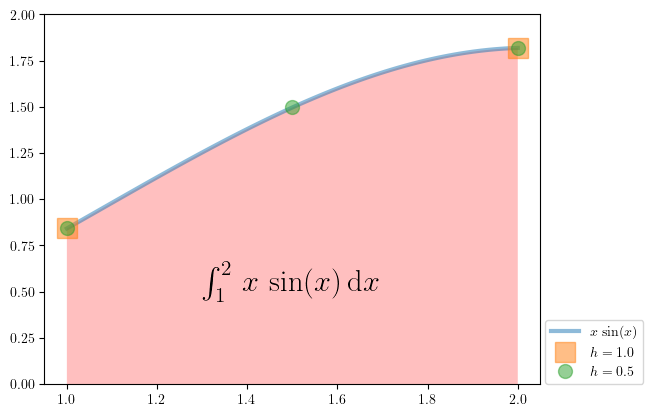

In [4]:
fig_motivacija()

Analitično izračunajmo točen rezultat:

In [48]:
import sympy as sym
sym.init_printing()
x = sym.symbols('x')
I_točno = float(sym.integrate(x*sym.sin(x), (x, 1, 2)).evalf())
I_točno

## Newton-Cotesov pristop

Na sliki je prikazan splošen primer, kjer je razdalja med vozlišči $x_i$ enaka $h$ (gre za **ekvidistantno delitev**).
![Integriranje](./fig/integriranje.png)

V okviru tega poglavja si bomo najprej pogledali trapezno ter sestavljeno trapezno pravilo, pozneje pa bosta sledili še Simpsonova ter Rombergova metoda.

### Trapezno pravilo

Trapezno pravilo vrednosti podintegralske funkcije $f(x)$ na (pod)intervalu $[x_0, x_1]$ interpolira z linearno funkcijo. Za dve vozliščni točki to pomeni, da površino pod grafom funkcije približno izračunamo kot:

$$I_{\textrm{trapezno}}=\sum_{i=0}^{n=1}A_i\,f(x_i)=\frac{h}{2}\cdot\left(f(x_0)+f(x_1)\right).$$

In so uteži:

$$A_0 = A_1 = \frac{1}{2}\,h.$$

#### Numerična implementacija

Numerična implementacija je:

In [49]:
def trapezno(y, h):
    """
    Trapezno pravilo integriranja.
    
    :param y: funkcijske vrednosti
    :param h: korak integriranja
    """
    return (y[0] + y[-1])*h/2

#### Numerični zgled

V konkretnem primeru to pomeni, da prvo in zadnjo funkcijsko vrednost utežimo s $h/2$. V našem primeru je $h=1$:

In [50]:
I_trapezno = trapezno(y2v, h=h2v)
I_trapezno

Pripravimo sliko:

In [54]:
def fig_trapezno():
    plt.fill_between(x2v, y2v, alpha=0.25, facecolor='r')
    plt.vlines(x2v, 0, y2v, color='r', linestyles='dashed', lw=1)
    plt.annotate('$I_{\\textrm{trapezno}}$', (1.4, 0.5), fontsize=22)
    plt.annotate('Napaka', fontsize=20, xy=(1.5, 1.4), xytext=(1.6, 1.8),
            arrowprops=dict(facecolor='gray', shrink=0.05))
    plt.plot(xg, yg, lw=3, alpha=0.5, label='$x\\,\\sin(x)$')
    plt.plot(x2v, y2v, 'o', alpha=0.5, label=f'$h={h2v}$')
    plt.legend(loc=(1.01, 0))
    plt.ylim(0, 2)
    plt.show()

Prikažemo:

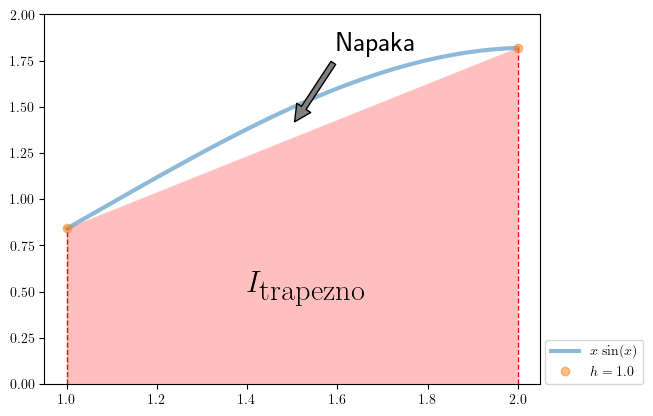

In [55]:
fig_trapezno()

#### Napaka trapeznega pravila

Razlika med analitično vrednostjo integrala in numeričnim približkom $I$ je napaka metode:

$$E = \int_a^bf(x)\,d x-I,$$

Če je funkcija $f(x)$ vsaj dvakrat odvedljiva, se lahko (glejte npr. vir: Burden, Faires, Burden: Numerical Analysis 10th Ed) izpelje ocena napake, ki velja samo za trapezni približek prek celega integracijskega intervala:

$$E_{\textrm{trapezno}}=-\frac{h^3}{12}f''(\xi),$$

kjer je $h=b-a$ in $\xi$ neznana vrednost na intervalu $[a,b]$.

### Sestavljeno trapezno pravilo

Če razdelimo interval $[a, b]$ na $n$ podintervalov in na vsakem uporabimo trapezno pravilo integriranja,  govorimo o *sestavljenem trapeznem pravilu* (angl. *composite trapezoidal rule*).

V tem primeru za vsak podinterval $i$ uporabimo trapezno pravilo in torej za meje podinterval $x_i$ in $x_{i+1}$ uporabimo uteži $A_i=A_{i+i}=h/2$. Ker so notranja vozlišča podvojena, sledi:

$$A_0=A_{n}=\frac{h}{2}\quad\textrm{in za ostala vozlišča:}\quad A_i=h.$$

Pri tem smo predpostavili podintervale enake širine:

$$h=\frac{x_{n}-x_0}{n}$$

Sledi torej:

$$I_{\textrm{trapezno sest}}=\sum_{i=0}^{n}A_i\,f(x_i)=\left(\frac{y_0}{2} + y_1+y_2+\cdots+y_{n-1}+\frac{y_{n}}{2}\right)\,h.$$

#### Numerična implementacija

Numerična implementacija je:

In [57]:
def trapezno_sest(y, h):
    """
    Sestavljeno trapezno pravilo integriranja.
    
    :param y: funkcijske vrednosti
    :param h: korak integriranja
    """    
    return (np.sum(y) - 0.5*y[0] - 0.5*y[-1])*h

#### Numerični zgled

Zgoraj smo že pripravili podatke za dva podintervala (tri vozlišča):

In [58]:
x3v

array([1. , 1.5, 2. ])

In [59]:
h3v

Izračunajmo oceno integrala s sestavljenim trapeznim pravilom:

In [60]:
I_trapezno_sest = trapezno_sest(y3v, h=h3v)
I_trapezno_sest

Pripravimo sliko:

In [63]:
def fig_trapezno_sest():
    plt.fill_between(x3v, y3v, alpha=0.25, facecolor='r')
    plt.vlines(x3v, 0, y3v, color='r', linestyles='dashed', lw=1)
    plt.annotate('$I_{\\textrm{trapezno sestavljeno}}$', (1.2, 0.5), fontsize=22)
    plt.annotate('Napaka', fontsize=20, xy=(1.75, 1.68), xytext=(1.4, 1.8),
            arrowprops=dict(facecolor='gray', shrink=0.05))
    plt.annotate('Napaka', fontsize=20, xy=(1.2, 1.1), xytext=(1., 1.4),
            arrowprops=dict(facecolor='gray', shrink=0.05))
    plt.plot(xg, yg, lw=3, alpha=0.5, label='$x\\,\\sin(x)$')
    plt.plot(x3v, y3v, 'o', alpha=0.5, label=f'$h={h3v}$')
    plt.legend(loc=(1.01, 0))
    plt.ylim(0, 2)
    plt.show()

Prikažemo:

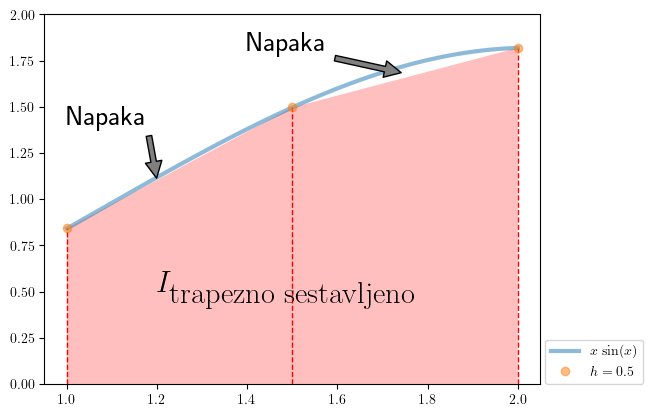

In [64]:
fig_trapezno_sest()

#### Napaka sestavljenega trapeznega pravila

Napaka sestavljenega trapeznega pravila izhaja iz napake trapeznega pravila; pri tem tako napako naredimo $n$-krat.

Ker velja $h\cdot n=b-a$, izpeljemo napako sestavljenega trapeznega pravila kot:

$$E_{\textrm{trapezno sest}}=-\frac{h^2(b-a)}{12}f''(\eta),$$

$\eta$ je vrednost na intervalu $[a,b]$. Napaka je drugega reda $\mathcal{O}(h^2)$.

#### Boljši približek integrala

V nadaljevanju si bomo pogledali t. i. **Richardsonovo ekstrapolacijo**, pri kateri na podlagi ocene integrala s korakom $h$ in $2h$ izračunamo boljši približek.

V kolikor integral $I$ numerično izračunamo pri dveh različnih korakih $h$ in $2\,h$, velja:

$$\int_a^b f(x)\,\textrm{d}x = I_h + E_h = I_{2h} + E_{2h},$$

kjer sta $I_h$ in $I_{2h}$ približka integrala s korakom $h$ in $2h$ ter $E_h$ in $E_{2h}$ oceni napake pri koraku $h$ in $2h$. Izpeljemo $I_{2h}-I_{h} = E_{h}-E_{2h}$

Naprej zapišemo:

$$E_h=-\frac{h^2(b-a)}{12}f''(\eta)=h^2\,K.$$

Ob predpostavki, da je $f''\left (\eta \right )$ pri koraku $h$ in $2h$ enak ($\eta$ je pri koraku $h$ in $2h$ dejansko različen), zapišemo:

$$E_{2h}=-\frac{(2h)^2(b-a)}{12}f''(\eta)=4\,h^2\,K$$

Sledi:

$$I_{2h}-I_h=-3K\,h^2.$$

Sedaj lahko ocenimo napako pri koraku $h$:

$$E_h=h^2\,K=\frac{I_h-I_{2h}}{3}.$$

Na podlagi ocene napake lahko izračunamo boljši numerični približek  $I_{h}^*$:

$$I_h^* = I_h + \frac{1}{3}\,(I_{h}-I_{2h})$$

ali

$$I_h^* = \frac{4}{3}\,I_h - \frac{1}{3}\,I_{2h}$$

#### Numerični zgled

Predhodno smo s trapeznim pravilom že izračunali integral pri koraku $h=1$ in pri koraku $h=0,5$, rezultata sta bila:

In [65]:
[I_trapezno, I_trapezno_sest]

S pomočjo zgornje formule izračunamo boljši približek:

In [66]:
I_trapezno_boljši = 4/3*I_trapezno_sest - 1/3*I_trapezno
print(f'Točen rezultat:   {I_točno}\nBoljši približek: {I_trapezno_boljši}')

Točen rezultat:   1.4404224209802097
Boljši približek: 1.4408392930139313


Sestavljeno trapezno pravilo je implementirano tudi v paketu ``numpy``, s funkcijo ``numpy.trapz``:

```python
trapz(y, x=None, dx=1.0, axis=-1)
```

* `y` predstavlja tabelo funkcijskih vrednosti, 
* `x` je opcijski parameter in definira vozlišča; če parameter ni definiran, se privzame ekvidistančna vozlišča na razdalji `dx`,
* `dx` definira (konstanten) korak integracije, ima privzeto vrednost 1,
* `axis` definira *os* po kateri se integrira (v primeru, da je `y` večdimenzijsko numerično polje).

Funkcija vrne izračunani integral po sestavljenem trapeznem pravilu. Več informacij lahko najdete v [dokumentaciji](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapezoid.html).

#### ``numpy`` implementacija sestavljenega trapeznega pravila

Poglejmo si primer:

In [68]:
#%%timeit
I_trapezno_np = np.trapezoid(y3v, dx=h3v)
I_trapezno_np

### Simpsonova in druge metode

Zgoraj smo si pogledali trapezno pravilo, ki temelji na linearni interpolacijski funkciji na posameznem podintervalu. Z interpolacijo višjega reda lahko izpeljemo še druge integracijske metode.

Izračunati moramo:

$$\int_{a}^b f(x)\,dx.$$

Tabeliramo podintegralsko funkcijo $f(x)$ in tabelo interpoliramo z Lagrangevim interpolacijskim polinomom $P_n(x)$ stopnje $n$:

$$P_n(x)=\sum_{i=0}^{n}\,f(x_i)\,l_i(x),$$

kjer so $y_i=f(x_i)$ funkcijske vrednosti v vozliščih $x_i$ in je Lagrangev polinom $l_i$ definiran kot:

$$l_i(x)=\prod_{j=0, j\ne i}^n \frac{x-x_j}{x_i-x_j}.$$

Za numerični izračun integrala $\int_{a}^b f(x)\,dx$ (meje so: $a=x_0$, $b=x_n$) namesto funkcije $f(x)$ vstavimo v integral interpolacijski polinom $P_n(x)$:

$$I=\int_{x_0}^{x_{n}} P_n(x)\,dx=\int_{x_0}^{x_{n}} \sum_{i=0}^{n}\,f(x_i)\,l_i(x)\,dx.$$

Ker je integriranje linearna operacija, lahko zamenjamo integriranje in vsoto:

$$I=\sum_{i=0}^{n}\,f(x_i)\,\underbrace{\int_{x_0}^{x_{n}} l_i(x)\,dx}_{A_i}.$$

Lagrangev polinom integriramo in dobimo uteži $A_i$:

$$A_i = \int_{x_0}^{x_{n}} l_i(x)\,dx$$

#### Izpeljava trapeznega pravila z uporabo Lagrangevih polinomov

Poglejmo si kako z Lagrangevim interpolacijskim polinomom prve stopnje strojno izpeljemo uteži $A_i$ v primeru trapeznega pravila.

Najprej v simbolni obliki definirajmo spremenljivko `x`, vozlišči `x0` in `x1` ter korak `h`:

In [69]:
x, x0, x1, h = sym.symbols('x x0, x1, h')

Pripravimo Python funkcijo, ki v simbolni obliki vrne seznam $n$ koeficientov Lagrangevih polinomov $[l_0(x), l_1(x),\dots, l_{n-1}(x)]$ stopnje $n-1$:

In [70]:
def lagrange(n, x, vozlišča_predpona='x'):
    if isinstance(vozlišča_predpona, str):
        vozlišča = sym.symbols(f'{vozlišča_predpona}:{n}') 
    coeffs = []
    for i in range(0, n):
        numer = []
        denom = []

        for j in range(0, n):
            if i == j:
                continue

            numer.append(x    - vozlišča[j])
            denom.append(vozlišča[i] - vozlišča[j])
        
        numer = sym.Mul(*numer)
        denom = sym.Mul(*denom)

        coeffs.append(numer/denom)
    return coeffs    

Najprej poglejmo Lagrangeva polinoma za linearno interpolacijo ($n=2$):

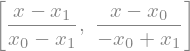

In [71]:
lag = lagrange(2, x)
lag

Sedaj Lagrangev polinom $l_0(x)$ integriramo čez celotni interval:

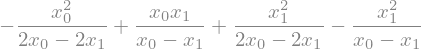

In [72]:
int0 = sym.integrate(lag[0], (x, x0, x1))
int0

Izraz poenostavimo in dobimo:

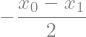

In [73]:
int1 = int0.factor()
int1

Ker je širina podintervala konstantna je $x_1=h_0+h$, izvedemo zamenjavo:

In [74]:
zamenjave = {x1: x0+h}
int1.subs(zamenjave)

Zgornje korake za Lagrangev polinom  $l_0(x)$ lahko posplošimo za seznam Lagrangevih polinomov:

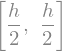

In [76]:
x, x0, x1, h = sym.symbols('x, x0, x1, h')
zamenjave = {x1: x0+h}
A_trapez = [sym.integrate(li, (x, x0, x1)).factor().subs(zamenjave) 
            for li in lagrange(2, x)]  # za vsak lagrangev polimom `li` v seznamu lagrange(2,x)
A_trapez

Izpeljali smo uteži, ki smo jih uporabili pri trapezni metodi:

$$A_0=h/2\qquad A_1=h/2.$$

Trapezno pravilo je:

$$I_{\textrm{trapezno}}=\frac{h}{2}\left(y_0+y_1\right)$$

Ocena napake je (vir: Burden, Faires, Burden: Numerical Analysis 10th Ed):

$$E_{\textrm{trapezno}}= -\frac{h^3}{12}f''(\xi).$$

#### Izračun uteži za Simpsonovo pravilo

Potem ko smo zgoraj pokazali strnjen izračun za trapezno pravilo, lahko podobno izvedemo za kvadratno interpolacijo čez tri točke ($n=3$).

Izračun uteži je analogen zgornjemu:

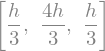

In [77]:
x, x0, x1, x2, h = sym.symbols('x, x0, x1, x2, h')
zamenjave = {x1: x0+h, x2: x0+2*h}
A_Simpson1_3 = [sym.integrate(li, (x, x0, x2)).factor().subs(zamenjave).factor() 
             for li in lagrange(3, x)]
A_Simpson1_3

Simpsonovo pravilo (to pravilo se imenuje tudi Simpsonovo 1/3 pravilo) je:

$$I_{\textrm{Simpsonovo}}=\frac{h}{3}\left(y_0+4\,y_1+y_2\right)$$

Ocena napake je (vir: Burden, Faires, Burden: Numerical Analysis 10th Ed):

$$E_{\textrm{Simpsonovo}}= -\frac{h^5}{90}f^{(4)}(\xi).$$

Pri tem je treba izpostaviti, da je napaka lokalno 5 reda  $\mathcal{O}(h^5)$ in definirana z neznano vrednostjo četrtega odvoda $f^{(4)}(\xi)$, posledično je to pravilo točno za polinome stopnje 3 ali manj.

Primer uporabe:

In [27]:
I_Simps = h3v/3 * np.sum(y3v * [1, 4, 1])
I_Simps

Pripravimo sliko. Ker Simsonovo pravilo temelji na kvadratni interpolaciji, moramo naprej pripraviti interpolacijski polinom (pomagamo si s ``scipy.interpolate``):

In [78]:
from scipy import interpolate

In [80]:
def fig_Simpsonovo():
    y_interpolate = interpolate.lagrange(x3v, y3v)
    plt.fill_between(xg, y_interpolate(xg), alpha=0.25, facecolor='r')
    plt.vlines(x3v, 0, y3v, color='r', linestyles='dashed', lw=1)
    plt.annotate('$I_{\\textrm{Simpsonovo}}$', (1.2, 0.5), fontsize=22)
    plt.annotate('Napaka', fontsize=20, xy=(1.75, 1.7), xytext=(1.4, 1.8),
            arrowprops=dict(facecolor='gray', shrink=0.05))
    plt.annotate('Napaka', fontsize=20, xy=(1.2, 1.1), xytext=(1., 1.4),
            arrowprops=dict(facecolor='gray', shrink=0.05))
    plt.plot(xg, yg, lw=3, alpha=0.5, label='$x\\,\\sin(x)$')
    plt.plot(x3v, y3v, 'o', alpha=0.5, label=f'$h={h3v}$')
    plt.legend(loc=(1.01, 0))
    plt.ylim(0, 2)
    plt.show()

Prikažemo:

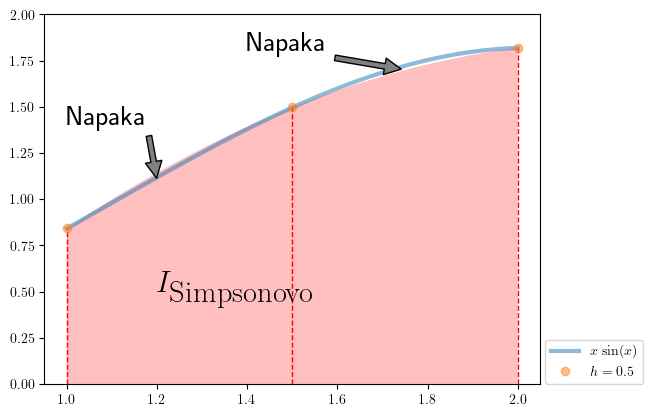

In [81]:
fig_Simpsonovo()

#### `scipy.integrate.newton_cotes`

Koeficiente integracijskega pristopa Newton-Cotes pridobimo tudi s pomočjo `scipy.integrate.newton_cotes()` [dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.newton_cotes.html#scipy.integrate.newton_cotes):

```python
newton_cotes(rn, equal=0)
```

kjer sta parametra:

* `rn`, ki definira število podintervalov (mogoč je tudi nekonstanten korak, glejte [dokumentacijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.newton_cotes.html#scipy.integrate.newton_cotes)),
* `equal`, ki definira ali se zahteva konstantno široke podintervale.

Funkcija vrne terko, pri čemer prvi element predstavlja numerično polje uteži in drugi člen oceno napake.

Poglejmo si primer:

In [82]:
from scipy import integrate
integrate.newton_cotes(2)

(array([0.33333333, 1.33333333, 0.33333333]), -0.011111111111111112)

#### Izračun uteži za Simpsonovo 3/8 pravilo

Nadaljujemo lahko s kubično interpolacijo čez štiri točke ($n=4$):

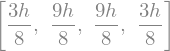

In [83]:
x, x0, x1, x2, x3, h = sym.symbols('x, x0, x1, x2, x3, h')
zamenjave = {x1: x0+h, x2: x0+2*h, x3: x0+3*h}
A_Simpson3_8 = [sym.integrate(li, (x, x0, x3)).factor().subs(zamenjave).factor() 
                for li in lagrange(4, x)]
A_Simpson3_8

Simpsonovo 3/8 pravilo je:

$$I_{\textrm{Simpsonovo 3/8}}=\frac{3h}{8}\left(y_0+3\,y_1+3\,y_2+y_3\right)$$

Ocena napake je (vir: Burden, Faires, Burden: Numerical Analysis 10th Ed):

$$E_{\textrm{Simpsonovo 3/8}}= -\frac{3\,h^5}{80}f^{(4)}(\xi).$$

Poglejmo si primer uporabe. Uporabimo pripravljeno tabelo vrednosti funkcije v štirih točkah:

In [33]:
y4v

array([0.84147098, 1.2959172 , 1.65901326, 1.81859485])

In [34]:
I_Simps38 = 3*h4v/8 * np.sum(y4v * [1, 3, 3, 1])
I_Simps38

Pripravimo še prikaz:

In [85]:
def fig_Simpsonovo38():
    y_interpolate = interpolate.lagrange(x4v, y4v)
    plt.fill_between(xg, y_interpolate(xg), alpha=0.25, facecolor='r')
    plt.vlines(x4v, 0, y4v, color='r', linestyles='dashed', lw=1)
    plt.annotate('$I_{\\textrm{Simpsonovo 3/8}}$', (1.2, 0.5), fontsize=22)
    plt.annotate('Napaka', fontsize=20, xy=(1.75, 1.7), xytext=(1.4, 1.8),
            arrowprops=dict(facecolor='gray', shrink=0.05))
    plt.annotate('Napaka', fontsize=20, xy=(1.5, 1.47), xytext=(1.1, 1.6),
            arrowprops=dict(facecolor='gray', shrink=0.05))
    plt.annotate('Napaka', fontsize=20, xy=(1.2, 1.1), xytext=(1., 1.4),
            arrowprops=dict(facecolor='gray', shrink=0.05))    
    plt.plot(xg, yg, lw=3, alpha=0.5, label='$x\\,\\sin(x)$')
    plt.plot(x4v, y4v, 'o', alpha=0.5, label=f'$h={h4v:.6f}$')
    plt.legend(loc=(1.01, 0))
    plt.ylim(0, 2)
    plt.show()

Prikažemo:

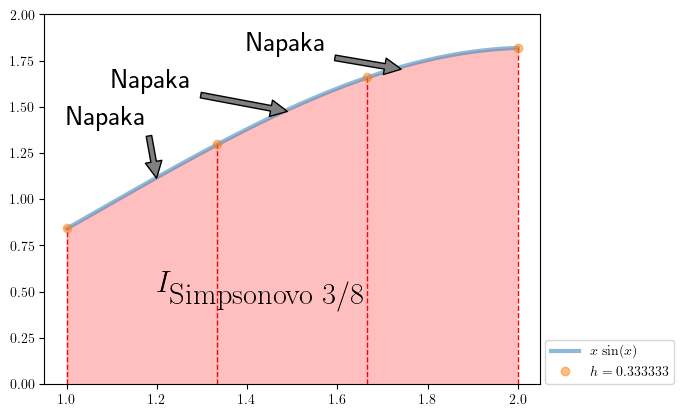

In [86]:
fig_Simpsonovo38() 

### Sestavljeno Simpsonovo pravilo

Interval $[a, b]$ razdelimo na sodo število $n$ podintervalov enake širine $h=(b - a)/n$, s čimer so definirana vozlišča $x_i=a+i\,h$ za $i=0,1,\dots,n$. V tem primeru zapišemo sestavljeno Simpsonovo pravilo:

$$\int_{a}^{b}f(x)\,\textrm{d}x=
\frac{h}{3}\left(
f(x_0)
+4\sum_{i=1}^{n/2}f(x_{2i-1})
+2\sum_{i=1}^{n/2-1}f(x_{2i})
+f(x_n)
\right)
\underbrace{
-\frac{b-a}{180}h^4\,f^{(4)}(\eta)
}_{E_{\textrm{Sestavljeno Simpsonovo 1/3}}}
,$$

kjer je $\eta$ neznana vrednost na intervalu $[a, b]$. Napaka je četrtega reda $\mathcal{O}(h^4)$.

Numerična implementacija:

In [87]:
def simpsonovo_sest(y, h):
    """
    Sestavljeno Simpsonovo pravilo integriranja.

    :param y: funkcijske vrednosti
    :param h: korak integriranja
    """    
    return h/3 * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]) + y[-1])

In [88]:
I_Simps_sest = simpsonovo_sest(y5v, h=h5v)
I_Simps_sest

Pripravimo sliko:

In [89]:
def fig_Simpsonovo_sest():
    y_interpolate = interpolate.lagrange(x5v, y5v)
    plt.fill_between(xg, y_interpolate(xg), alpha=0.25, facecolor='r')       
    plt.vlines(x5v, 0, y5v, color='r', linestyles='dashed', lw=1)
    plt.annotate('$I_{\\textrm{Simpsonovo sestavljeno}}$', (1.2, 0.5), fontsize=22)
    plt.annotate('Napaka', fontsize=20, xy=(1.70, 1.68), xytext=(1.4, 1.8),
            arrowprops=dict(facecolor='gray', shrink=0.05))
    plt.plot(xg, yg, lw=3, alpha=0.5, label='$x\\,\\sin(x)$')
    plt.plot(x5v, y5v, 'o', alpha=0.5, label=f'$h={h5v}$')
    plt.legend(loc=(1.01, 0))
    plt.ylim(0, 2)
    plt.show()

Prikažemo:

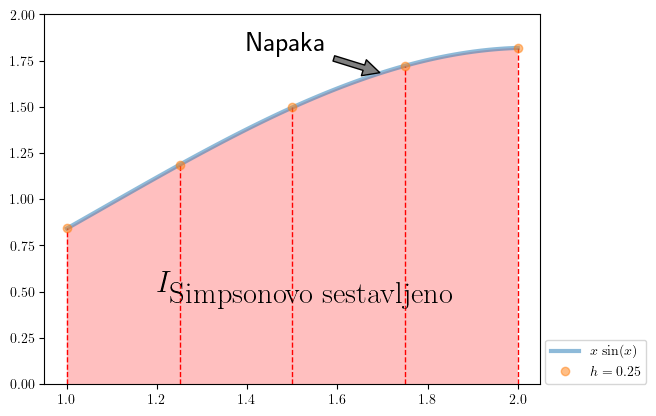

In [90]:
fig_Simpsonovo_sest()

#### Boljša ocena integrala

Napaka sestavljene Simpsonove metode je definirana z:

$$E_{\textrm{Sestavljeno Simpsonovo 1/3}}= 
-\frac{b-a}{180}h^4\,f^{(4)}(\eta),$$

kjer je $\eta$ neznana vrednost na intervalu $[a, b]$.

Izboljšano oceno integrala določimo na podoben način kakor pri sestavljeni trapezni metodi; integral $I$ ocenjujemo pri dveh različnih korakih $h$ in $2\,h$, velja natančno:

$$\int_a^b f(x)\,\textrm{d}x = I_h + E_h = I_{2h} + E_{2h},$$

kjer je $I_h$ približek integrala s korakom $h$ in $E_h$ ocena napake pri koraku $h$; analogno velja za $I_{2h}$ in $E_{2h}$.

Če predpostavimo, da je $f^{(4)}\left (\eta \right )$ v obeh primerih enak, lahko določimo razliko $I_{2h}-I_{h} = E_{h}-E_{2h}$. 

Naprej zapišemo:

$$E_h=-\frac{b-a}{180}h^4\,f^{(4)}(\eta)=h^4\,K.$$

Ob predpostavki, da je $f^{(4)}\left (\eta \right )$ pri koraku $h$ in $2h$ enak ($\eta$ je pri koraku $h$ in $2h$ dejansko različen), zapišemo:

$$E_{2h}=-\frac{(b-a)}{180}(2h)^4\,f^{(4)}(\eta)=16\,h^4\,K$$

Sledi:

$$I_{2h}-I_h=-15K\,h^4.$$

Sedaj lahko ocenimo napako pri koraku $h$:

$$E_h=h^4\,K=\frac{I_h-I_{2h}}{15}.$$

Na podlagi ocene napake lahko izračunamo boljši približek  $I_{h}^*$:

$$I_h^* = I_h + \frac{1}{15}\,(I_{h}-I_{2h})$$

ali

$$I_h^* = \frac{16}{15}\,I_h - \frac{1}{15}\,I_{2h}$$

#### Numerični zgled

Predhodno smo s Simpsonovim pravilom že izračunali integral pri koraku $h=0,5$ in pri koraku $h=0,25$, rezultata sta bila:

In [91]:
[I_Simps, I_Simps_sest]

S pomočjo zgornje formule izračunamo boljši približek:

In [92]:
I_Simps_boljši = 16/15*I_Simps_sest - 1/15*I_Simps
print(f'Točen rezultat:   {I_točno}\nBoljši približek: {I_Simps_boljši}')

Točen rezultat:   1.4404224209802097
Boljši približek: 1.4404218714139077


Pridobimo boljši numerični približek, izgubimo pa oceno napake!

#### Simpsonova metoda v ``scipy.integrate.simps``

V ``scipy`` je implementirano sestavljeno Simpsonovo pravilo v `scipy.integrate.simpson()` ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html)):

```python
simpson(y, x=None, dx=1, axis=-1, even='avg')
```

kjer so parametri:

* `y` tabela funkcijskih vrednosti, ki jih integriramo,
* `x` vozlišča, gre za opcijski parameter, če je `x=None`, se predpostavi ekvidistantne podintervale širine `dx`,
* `dx` širina ekvidistantnih podintervalov oz korak integriranja,
* `axis` os integriranja (pomembno v primeru večdimenzijskega numeričnega polja)
* `even` je lahko {`'avg'`, `'first'`, `'last'`} in definira način integriranja v primeru lihega števila podintervalov.

Poglejmo si primer, najprej uvozimo funkcijo `simpson`:

In [94]:
from scipy.integrate import simpson

In [95]:
#%%timeit
simpson(y5v, dx=h5v)

### Rombergova metoda*

Rombergova metoda temelji na Richardsonovi ekstrapolaciji. Predpostavimo, da integral $\int_a^b f(x)\textrm{d}x$ integriramo na intervalu $[a,b]$, ki ga razdelimo na $2^{n-1}$ podintervalov ($n=1,2,4,8, \dots$).

Rezultat trapeznega pravila pri $n=1$ označimo z $R_{\underbrace{1}_{n},\underbrace{1}_{j}}$, pri čemer $j$ označuje natančnost pridobljenega rezultata $\mathcal{O}(h^{2j})$.

Če uporabimo trapezno integracijsko pravilo pri $n=1,2,4 \dots$ podintervalih, izračunamo:

* $R_{1,1}$, korak $h_1=h$, red natančnosti $\mathcal{O}(h_1^2)$,
* $R_{2,1}$, korak $h_2=h/2$, red natančnosti $\mathcal{O}(h_2^2)$,
* $R_{3,1}$, korak $h_3=h/4$, red natančnosti $\mathcal{O}(h_3^2)$,
* $R_{4,1}$, korak $h_4=h/8$, red natančnosti $\mathcal{O}(h_4^2)$,
* $\dots$
* $R_{n,1}$, korak $h_4=h/(2^{n-1})$, red natančnosti $\mathcal{O}(h_n^2)$.

Na podlagi Richardsonove ekstrapolacije izračunamo boljši približek

* $R_{2,2} = R_{2,1} + \frac{1}{3}\left(R_{2,1}-R_{1,1}\right)$, korak $h_2=h/2$, red natančnosti $\mathcal{O}(h_2^4)$,
* $R_{3,2} = R_{3,1} + \frac{1}{3}\left(R_{3,1}-R_{2,1}\right)$, korak $h_3=h/4$, red natančnosti $\mathcal{O}(h_3^4)$,
* $\dots$
* $R_{n,2} = R_{n,1} + \frac{1}{3}\left(R_{n,1}-R_{n-1,1}\right)$, korak $h_n=h/(2^{n-1})$, red natančnosti $\mathcal{O}(h_n^4)$.


Nato nadaljujemo z Richardsonovo ekstrapolacijo:

* $R_{3,3} = R_{3,2} + \frac{1}{15}\left(R_{3,2}-R_{2,2}\right)$, korak $h_3=h/4$, red natančnosti $\mathcal{O}(h_3^6)$,
* $\dots$
* $R_{n,3} = R_{n,2} + \frac{1}{15}\left(R_{n,2}-R_{n-1,2}\right)$, korak $h_n=h/(2^{n-1})$, red natančnosti $\mathcal{O}(h_n^6)$.


Richardsonovo extrapolacijo lahko posplošimo:

* $R_{n,j} = R_{n,j-1} + \frac{1}{4^{j-1}-1}\left(R_{n,j-1}-R_{n-1,j-1}\right)$, korak $h_n=h/(2^{n-1})$, red natančnosti $\mathcal{O}(h_n^{2j})$


Pri tem je boljši približek $R_{2,2}$ pri koraku $h/2$ enak rezultatu, ki ga dobimo po Simpsonovi metodi pri koraku $h/2$. Podobno je boljši približek $R_{3,2}$ pri koraku $h/4$ enak numeričnemu integralu Simpsonove metode pri koraku $h/4$. In je dalje $R_{3,3}$ enak popravljenemu približku Simpsonove metode pri koraku $h/4$.

Pripravimo numerične podatke:

In [96]:
x9v, h9v = np.linspace(1, 2, 9, retstep=True)  # korak h9v = 0.125 (9 vozlišč)
y9v = x9v * np.sin(x9v)

Poglejmo si primer od zgoraj. Najprej s sestavljeno trapezno metodo izračunamo integral pri različnih korakih (drugi red napake):

In [97]:
## O(h^2)
R1_1 = trapezno_sest(y9v[::8], 8*h9v) # h=1.0
R2_1 = trapezno_sest(y9v[::4], 4*h9v) # h=0.5
R3_1 = trapezno_sest(y9v[::2], 2*h9v) # h=0.25
R4_1 = trapezno_sest(y9v, h9v) # h=0.125
[R1_1, R2_1, R3_1, R4_1]

Nato izračunamo boljše približke (dobimo četrti red napake):

In [98]:
## O(h^4)
R2_2 = R2_1 + 1/3 * (R2_1 - R1_1)
R3_2 = R3_1 + 1/3 * (R3_1 - R2_1)
R4_2 = R4_1 + 1/3 * (R4_1 - R3_1)
[R2_2, R3_2, R4_2]

Rezultati predstavljajo rezultat Simpsonove metode pri koraku $h=0,5$, $h=0,25$ in $h=0.125$:

In [99]:
[simpsonovo_sest(y9v[::4], 4*h9v), simpsonovo_sest(y9v[::2], 2*h9v), simpsonovo_sest(y9v, h9v)]

Ponovno izračunamo boljše približke (dobimo šesti red napake):

In [100]:
## O(h6)
R3_3 = R3_2 + 1/15 * (R3_2 - R2_2)
R4_3 = R4_2 + 1/15 * (R4_2 - R3_2)

[R3_3, R4_3]

Rezultat predstavlja boljši rezultat Simpsonove pri koraku $h=0,25$ in $h=0.125$:

In [101]:
a4h, a2h, ah = [simpsonovo_sest(y9v[::4], 4*h9v), simpsonovo_sest(y9v[::2], 2*h9v), simpsonovo_sest(y9v, h9v)]
[16/15*a2h-1/15*a4h, 16/15*ah-1/15*a2h]

Ponovno izračunamo boljše približke (dobimo osmi red napake):

In [102]:
## O(h8)
R4_4 = R4_3 + 1/63 * (R4_3 - R3_3)
R4_4

Rombergova metoda nam torej ponuja visoko natančnost rezultata za relativno majhno numerično ceno. Napako pa ocenimo:

$$E = \left|R_{n,n}-R_{n-1,n-1}\right|.$$

#### Rombergova metoda v ``scipy.integrate.romb``

V ``scipy`` je implementirana Rombergova metoda v `scipy.integrate.romb()` ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)):

```python
romb(y, dx=1.0, axis=-1, show=False)
```

kjer so parametri:

* `y` tabela funkcijskih vrednosti, ki jih integriramo,
* `dx` širina ekvidistantnih podintervalov oz korak integriranja,
* `axis` or integriranja (pomembno v primeru večdimenzijskega numeričnega polja),
* `show` če je `True` prikaže elemente Richardsonove ekstrapolacije.

Poglejmo si primer od zgoraj:

In [103]:
from scipy.integrate import romb

In [104]:
y9v

array([0.84147098, 1.01505104, 1.18623077, 1.34872795, 1.49624248,
       1.62261343, 1.72197541, 1.78891084, 1.81859485])

In [105]:
romb(y9v, dx=h9v, show=True)

Richardson Extrapolation Table for Romberg Integration
 1.33003 
 1.41314  1.44084 
 1.43362  1.44045  1.44042 
 1.43872  1.44042  1.44042  1.44042 


## Gaussov integracijski pristop

Newton-Cotesov pristop temelji na polinomu $n$-te stopnje in napaka je $n+1$ stopnje. To pomeni, da integracija daje točen rezultat, če je integrirana funkcija polinom stopnje $n$ ali manj.

Gaussov integracijski pristop je v principu drugačen: cilj je integral funkcije $f(x)$ nadomestiti z uteženo vsoto vrednosti funkcije pri diskretnih vrednostih $f(x_i)$:

$$\int_a^bf(x)\,\textrm{d}x\approx \sum_{i=0}^{n-1} A_i\, f(x_i).$$

Pri tem je neznana utež $A_i$ in tudi lega vozlišča $x_i$. Za stopnje polinoma $n$ bomo potrebovali tudi več  točk $(x_i, f(x_i))$.

V nadaljevanju bomo spoznali, da lahko zelo učinkovito izračunamo numerično točen integral. Prednost Gaussove integracije je tudi, da lahko izračuna integral funkcij s singularnostmi (npr: $\int_0^1\sin(x)/\sqrt{(x)}\,dx$).

### Gaussova kvadratura z enim vozliščem

Predpostavimo, da želimo integrirati polinom stopnje $n=1$ (linearna funkcija):

$$f(x)=P_1(x)=a_0+a_1\,x.$$

Izračunajmo: 

$$\int_{x_L}^{x_D}P_1(x)\,\textrm{d}x=\left(a_0\,x+a_1\,\frac{x^2}{2}\right)_{x_L}^{x_D}=-a_0\,x_L+a_0\,x_D-\frac{a_1\,x_L^2}{2}+\frac{a_1\,x_D^2}{2}.$$

Po drugi strani pa želimo integral izračunati glede na ustrezno uteženo $A_0$ vrednost funkcije $f(x_0)$ v neznanem vozlišču $x_0$ (samo eno vozlišče!):

$$\int_{x_L}^{x_D}P_1(x)\,\textrm{d}x = A_0\,P_1(x_0)= A_0\,a_0+A_0\,a_1\,x_0.$$

Z enačenjem zgornjih izrazov izpeljemo:

$$-a_0\,x_L+a_0\,x_D-\frac{a_1\,x_L^2}{2}+\frac{a_1\,x_D^2}{2}=A_0\,a_0+A_0\,a_1\,x_0.$$

$a_0$ in $a_1$ sta koeficienta linearne funkcije, ki lahko zavzame poljubne vrednosti, zato velja:

$$a_0\,\left(-x_L+x_D-A_0\right)=0\qquad\textrm{in}\qquad a_1\left(-\frac{x_L^2}{2}+\frac{x_D^2}{2}-A_0\,x_0\right)=0.$$

Gre za sistem linearnih enačb z rešitvijo:

$$A_0= x_D-x_L, \qquad x_0=\frac{x_L+x_D}{2}.$$

Če je integrirana funkcija linearna, bomo samo na podlagi vrednosti v eni točki izračunali pravo vrednost!

Da je Gaussov integracijski pristop neodvisen od mej integriranja $x_L$, $x_D$, pa uvedemo standardne meje.

#### Standardne meje: $x_L=-1$ in $x_D=1$

Zaradi splošnosti meje $x\in[x_L, x_D]$ transformiramo v $\xi\in[-1, +1]$ s pomočjo:

$$x=\frac{x_D+x_L}{2}+\frac{x_D-x_L}{2}\xi$$

in

$$\textrm{d}x=\frac{x_D-x_L}{2}\textrm{d}\xi.$$

Velja:

$$\int_{x_L}^{x_D}f(x)\,\textrm{d}x=\int_{-1}^1 g\left(\xi\right)\,\textrm{d}\xi,$$

kjer je:

$$g(\xi)=\frac{x_D-x_L}{2}\,f\left(\frac{x_L+x_d}{2}+\frac{x_D-x_L}{2}\xi\right).$$

V primeru standardnih mej, je pri eni Gaussovi točki utež $A_0=2$ in $x_0=0$ vrednost, pri kateri moramo izračunati funkcijo $f(x_0)$.

#### Strojno izpeljevanje uteži in Gaussove točke

Definirajmo simbole in nastavimo enačbo:

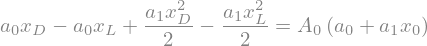

In [106]:
a_0, a_1, x, x_L, x_D, A_0, x_0 = sym.symbols('a_0, a_1, x, x_L, x_D, A_0, x_0') # simboli
P1 = a_0 + a_1*x                                                   # linearni polinom
eq = sym.Eq(P1.integrate((x, x_L, x_D)).expand(), A_0*P1.subs(x, x_0)) # teoretični integral = ocen z utežmi
eq

Pripravimo dve enačbi (za prvo predpostavimo $a_0=0, a_1=1$, za drugo predpostavimo $a_0=1, a_1=0$) ter rešimo sistem za `A_0` in `x_0`:

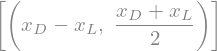

In [107]:
sym.solve([eq.subs(a_0, 0).subs(a_1, 1), eq.subs(a_1, 0).subs(a_0, 1)], [A_0, x_0])

Za dodatno razlago priporočam [video posnetek](https://www.youtube.com/watch?v=iQ5-4hx25Rw).

### Gaussova integracijska metoda z več vozlišči

Izpeljati želimo Gaussovo integracijsko metodo, ki bo upoštevala na intervalu $[a,b]$ $v$ vozlišč in bo točno izračunala integral polinomov do stopnje $n=2v-1$. Veljati mora:

$$\int_a^bP_{2v-1}(x)\,\textrm{d}x = \sum_{i=0}^{v-1} A_i\,P_{2v-1}(x_i).$$

Pri izpeljavi se bomo omejili na standardne meje $x_L=-1$, $x_D=1$,

kjer je polinom stopnje $n=2v-1$ definiran kot:

$$P_{2v-1}(x)=\sum_{i=0}^{2v-1} a_i\,x^i.$$

Z dvema Gaussovima točkama/vozliščema točno izračunamo integral polinoma do tretjega reda, s tremi Gausovimi vozlišči pa točno izračunamo integral polinoma do petega reda!

#### Strojno izpeljevanje
Pripravimo si najprej simbolni zapis polinoma in ustreznih spremenljivk:

In [108]:
def P_etc(n=1, a='a', x='x'):                       # n je stopnja polinoma
    ai = sym.symbols(f'{a}:{n+1}')  # seznam a_i
    x = sym.symbols(x)                              # spremenljivka x
    return ai, x, sum([ai[i]*x**i for i in range(n+1)])

Sedaj pa poiščimo uteži $A_i$ in vozlišča $x_i$ za primer dveh Gaussovih vozlišč; polinom je torej tretje stopnje.

In [110]:
v = 2 # število vozlišč
ai, x, P = P_etc(n=2*v-1)
xi = sym.symbols(f'x:{v}') # seznam x_i
Ai = sym.symbols(f'A:{v}') # seznam w_i
print(f'Vozlišča: {xi}\nUteži:    {Ai}')

Vozlišča: (x0, x1)
Uteži:    (A0, A1)


Polinom:

In [111]:
P

Podobno kakor zgoraj za eno vozlišče, tukaj definirajmo enačbe:

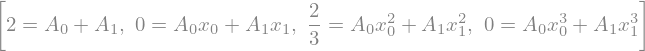

In [112]:
eqs = [sym.Eq(P.integrate((x, -1, 1)).coeff(a_),\
              sum([Ai[i]*P.subs(x, xi[i]) \
                   for i in range(v)]).expand().coeff(a_)) \
       for a_ in ai]
eqs

Rešimo jih za za neznane $x_i$ in $w_i$:

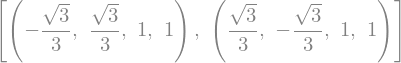

In [113]:
sol = sym.solve(eqs, sym.flatten((xi, Ai)))
sol

Določili smo seznam dveh (enakih) rešitev. 

Najprej sta definirani vozlišči: $x_0=-\sqrt{3}/3$ in $x_1=\sqrt{3}/3$, katerima pripadata uteži $A_0=A_1=1$.

Koda zgoraj je izpeljana v splošnem - število vozlišč `v` lahko povečate ter izračunate vozlišča ter pripadajoče uteži.

Spodaj je podana tabela vozlišč in uteži za eno, dve in tri vozlišča (za meje $a=-1$, $b=1$):


**Število točk 1:**

| $i$ | Vozlišče  $x_i$ | Utež $A_i$ |
|:------------:|:------------:|:------------:|
|0 | 0 | 2 |


**Število točk 2:**

| $i$ | Vozlišče  $x_i$ | Utež $A_i$ |
|:------------:|:------------:|:------------:|
|0 | $-\frac{\sqrt{3}}{3}$ | 1 |
|1 | $+\frac{\sqrt{3}}{3}$ | 1 |

**Število točk 3:**

| $i$ | Vozlišče  $x_i$ | Utež $A_i$ |
|:------------:|:------------:|:------------:|
|0 | $-\frac{\sqrt{15}}{5}$ | $\frac{5}{9}$ |
|1 | $0$ | $\frac{8}{9}$ |
|2 | $\frac{\sqrt{15}}{5}$ | $\frac{5}{9}$ |

Za več vozlišč in tudi oceno napake, glejte [Mathworld  Legendre-Gauss Quadrature](http://mathworld.wolfram.com/Legendre-GaussQuadrature.html).

Za primer treh Gaussovih točk numerični integral izračunamo (standardne meje):

$$I_{\textrm{Gauss3}}= \frac{5}{9}\,f\left(-\frac{\sqrt{15}}{5}\right) + \frac{8}{9}\,f\left(0\right)+\frac{5}{9}\,f\left(\frac{\sqrt{15}}{5}\right).$$

#### Numerična implementacija

Numerična implementacija (vključno s transformacijo mej) za eno, dve ali tri vozlišča:

In [114]:
def Gaussova(fun, a, b, vozlišč=1):
    """ 
    Gaussova integracijska metoda.

    :param fun: objekt funkcije, ki jo integriramo
    :param a:   spodnja meja
    :param b:   zgornja meja
    :param vozlišča: število vozlišč (1, 2 ali 3)
    """
    def g(xi): # funkcija za transformacijo mej
        return (b-a)/2 * fun((b+a +xi * (b-a))/2)
    
    if vozlišč == 1:
        return 2*g(0.)
    elif vozlišč == 2:
        return 1. * g(-np.sqrt(3)/3) + 1. * g(np.sqrt(3)/3)        
    elif vozlišč == 3:
        return 5/9 * g(-np.sqrt(15)/5) +8/9 * g(0.) + 5/9 * g(np.sqrt(15)/5)

Poglejmo si zgled. Najprej definirajmo funkcijo, ki jo želimo integrirati:

In [115]:
def f(x):
    return x*np.sin(x)

Sedaj pa funkcijo (v konkretnem primeru `f`) in ne vrednosti (npr. `f(0.)`) posredujemo funkciji `Gaussova`. Najprej za eno vozlišče, nato dve in tri:

In [116]:
Gaussova(fun=f, a=1., b=2., vozlišč=1)

In [117]:
Gaussova(fun=f, a=1., b=2., vozlišč=2)

In [118]:
Gaussova(fun=f, a=1., b=2., vozlišč=3)

#### ``scipy.integrate.fixed_quad``

Znotraj ``scipy`` je Gaussova integracijska metoda implementirana v okviru funkcije `scipy.integrate.fixed_quad()` ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.fixed_quad.html)):

```python
fixed_quad(func, a, b, args=(), n=5)
```

kjer so parametri:

* `func` je ime funkcije, ki jo kličemo,
* `a` je spodnja meja,
* `b` je zgornja meja,
* `args` je terka morebitnih dodatnih argumentov funkcije `func`,
* `n` je število vozlišč Gaussove integracije, privzeto `n=5`.

Funkcija vrne terko z rezultatom integriranja `val` in vrednost `None`: `(val, None)`

Poglejmo primer od zgoraj:

In [ ]:
from scipy.integrate import fixed_quad
fixed_quad(f, a=1, b=2, n=3)[0]

Rezultat je enak predhodnemu:

In [ ]:
Gaussova(fun=f, a=1., b=2., vozlišč=3)

## ``scipy.integrate``

``scipy.integrate`` je močno orodje za numerično integriranje (glejte [dokumentacijo](https://docs.scipy.org/doc/scipy/reference/integrate.html)). V nadaljevanju si bomo pogledali nekatere funkcije.

### Intergracijske funkcije, ki zahtevajo definicijsko *funkcijo*:

* `quad(func, a, b[, args, full_output, ...])`	izračuna določeni integral `func(x)` v mejah [`a`, `b`],
* `dblquad(func, a, b, gfun, hfun[, args, ...])`	izračuna določeni integral `func(x,y)`,
* `tplquad(func, a, b, gfun, hfun, qfun, rfun)`	izračuna določeni integral `func(x,y,z)`,
* `nquad(func, ranges[, args, opts, full_output])`	izračuna določeni integral $n$ dimenzijske funkcije `func( ...)`,
* `romberg(function, a, b[, args, tol, rtol, ...])`	integracija Romberg za funkcijo `function`,

#### `scipy.integrate.quad`

Poglejmo si zelo uporabno funkcijo za integriranje, `scipy.integrate.quad()` ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)):

```python
quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, 
     points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
```

Izbrani parametri so:

* `func` Python funkcija, ki jo integriramo,
* `a` spodnja meja integriranja (lahko se uporabi `np.inf` za mejo v neskončnosti),
* `b` zgornja meja integriranja (lahko se uporabi `np.inf` za mejo v neskončnosti),
* `full_output` za prikaz vseh rezultatov, privzeto 0,
* `epsabs` dovoljena absolutna napaka,
* `epsrel` dovoljena relativna napaka.

Poglejmo primer od zgoraj:

In [ ]:
from scipy import integrate

In [ ]:
integrate.quad(f, a=1, b=2)

#### `scipy.integrate.dblquad`

Gre za podobno funkcijo kot `quad`, vendar za integriranje po dveh spremenljivkah ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html#scipy.integrate.dblquad)).
Funkcija `scipy.integrate.dblquad()` izračuna dvojni integral `func(y, x)` v mejah od `x = [a, b]` in `y = [gfun(x), hfun(x)]`.

```python
dblquad(func, a, b, gfun, hfun, args=(), epsabs=1.49e-08, epsrel=1.49e-08)
```

Izbrani parametri so:

* `func` je Python funkcija, ki jo integriramo,
* `a` je spodnja meja integriranja `x` (lahko se uporabi `np.inf` za mejo v neskončnosti),
* `b` je zgornja meja integriranja `x` (lahko se uporabi `np.inf` za mejo v neskončnosti),
* `gfun` je Python funkcija, ki definira spodnjo mejo `y` v odvisnosti od `x`,
* `hfun` je Python funkcija, ki definira zgornjo mejo `y` v odvisnosti od `x`.

Poglejmo primer izračuna površine polkroga s polmerom 1:

$$\int_{-1}^{1}\left(\int_0^{\sqrt{1-x^2}}1\,\textrm{d}y\right)\,\textrm{d}x=\frac{\pi}{2}$$

Definirajmo ustrezne Python funkcije in izračunajmo rezultat:

In [ ]:
def func(y, x): # integracijska funkcija je enostavna, konstanta = 1!
    return 1.
def gfun(x):    # spodnja meja = 0
    return 0.
def hfun(x):    # zgornja meja
    return np.sqrt(1-x**2)
integrate.dblquad(func=func, a=-1, b=1, gfun=gfun, hfun=hfun)

### Intergracijske funkcije, ki zahtevajo tabelo vrednosti:

* `trapz(y[, x, dx, axis])` sestavljeno trapezno pravilo,
* `cumtrapz(y[, x, dx, axis, initial])` kumulativni integral podintegralske funkcije (vrne rezultat v vsakem vozlišču),
* `simps(y[, x, dx, axis, even])`	Simpsonova metoda,
* `romb(y[, dx, axis, show])`	Rombergova metoda.

Tukaj si bomo na primeru ogledali funkcijo `cumtrapz`. Kot primer si, ko na maso $m=1$ (enote izpustimo) deluje sila $F=\sin(t)$. Iz 2. Newtonovega zakona sledi: $F=m\,\ddot x$. Pospešek integriramo, da izračunamo hitrost; nato integriramo še enkrat za pomik. Definirajmo najprej funkcijo za pospešek:

In [ ]:
def pospešek(t):
    F = np.sin(t)
    m = 1
    return F/m

Zanima nas dogajanje v času 3 sekund:

In [ ]:
t, h = np.linspace(0, 3, 100, retstep=True)

Izračunajmo tabelo pospeškov ter nato integrirajmo za hitrost (pri tem je pomembno, da definiramo začetno vrednost):

In [ ]:
a = pospešek(t)
v = integrate.cumtrapz(y=a, dx=h, initial=0)

Hitrost sedaj še enkrat integrirajmo, da izračunamo pot:

In [ ]:
s = integrate.cumtrapz(y=v, dx=h, initial=0)

Prikažimo rezultat:

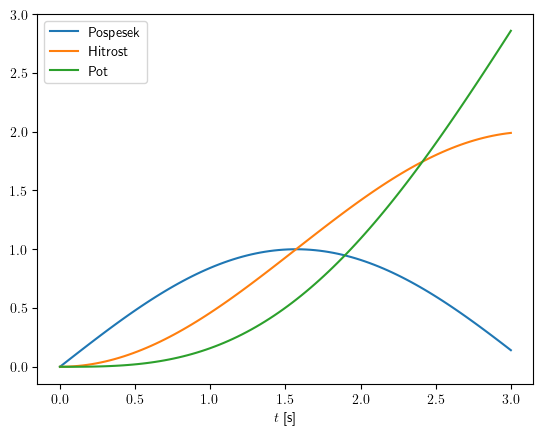

In [ ]:
plt.plot(t, a, label='Pospesek')
plt.plot(t, v, label='Hitrost')
plt.plot(t, s, label='Pot')
plt.xlabel('$t$ [s]')
plt.legend();

## Nekaj vprašanj za razmislek!

1. Na sliki (vir: J. Slavič: Dinamika, meh. nihanja ..., 2014) je prikazan trikotnik s stranicami dolžine $a$, $b$, z debelino $h$ in gostoto $\rho$.
![Trikotnik iz knjige...](./fig/Slavic_2014_str_242_slika_5.4.png)
V simbolni obliki določite masni vztrajnostni moment glede na prikazano os $y$:
$$J_{yy}=\int_0^b y^2\,\rho\,h\,(a-a/b\,y)\,\textrm{d}y.$$
Upoštevajte tudi: $m=a\,b\,h\,\rho/2$. Za izmišljene vrednosti izračunajte numerični rezultat.
2. Izračunajte integral tudi numerično. Uporabite ``scipy.integrate`` in integrirajte glede na pravila: trapezno, Simpsonovo 1/3. Rezultat primerjajte tudi z Gaussovo kvadraturo.
Raziščite natančnost in hitrost metod.
3. Preštudirajte ``scipy.special.legendre``, ki vam vrne objekt ``orthopoly1d``. Ta objekt ima metodo ``weights``, ki vrne seznam ``[x, w, mu0]`` vrednosti, ki jih uporabimo pri Gaussovi kvadraturi. (Če vsega ne razumete, ne skrbite preveč, bo asistent pokazal/komentiral). Opazite lahko, da smo vrednosti izpeljali na predavanjih!
4. S pomočjo zgoraj pridobljenih uteži in vozlišč izračunajte integral s pomočjo Gaussove kvadrature: $\sum_iw_i\,f(x_i)$. Pazite na transformacijo mej.
5. Preprost integral $\int_0^2x^2\,dx$ izrabite za prikaz trapeznega in Simpsonovega 1/3 pravila (osnovno pravilo, ne sestavljeno). Uteži izračunajte z uporabo ``scipy``.
6. Integral predhodne točke razširite za sestavljeno trapezno pravilo (lastna koda). Prikažite vpliv števila podintervalov, primerjajte napako izračuna s predhodnim številom podintervalov in prikažite konvergenco.
7. Integral predhodne točke razširite za sestavljeno Simpsonovo 1/3 pravilo (lastna koda). Prikažite vpliv števila podintervalov, primerjajte napako izračuna s predhodnim številom podintervalov in prikažite konvergenco.
8. Z različnimi metodami izračunajte integrala (namig: vse metode niso primerne):
$\int_1^2\frac{\sin(x)}{\sqrt{x}}.$
9. S pomočjo numeričnega integriranja določite ekvivalentno silo porazdeljene obremenitve ($Q$) ter njeno prijemališče vzdolž nosilca ($x_Q$) dolžine $L = 2\,$m. Konstanta obremenitve: $q_0 = 5\,$kN/m.
![Sila porazdeljene obremenitve](./fig/nal-num_integriranje_1-1.jpg)
Rešitev: 
ekvivalentna obremenitev $Q = \int_0^L{q(x) \mathrm{d}x}$, pozicija (težišče) $x_Q = \frac{ \int_0^L{x\,q(x) \mathrm{d}x} }{ \int_0^L{q(x) \mathrm{d}x} }$

## Dodatno

1. Obravnavajte prikazan enoosni primer, obremenjen s porazdeljeno obremenitvijo $n(x)$ ter točkovno silo $F=10\,$kN. Dolžina palice je $L = 2\,$m, konstanta $n_0 = 15\,$kN/m in $EA = 200000\,\mathrm{MPa} \times 50×50\, \mathrm{mm^2}$.
![Porazdeljena obremenitev](./fig/nal-num_integriranje_2-2.jpg)
Naloga: 
    1. S pomočjo simbolnega integriranja določite funkcijo notranje osne sile $N(x)$.
    2. S pomočjo numeričnega integriranja izračunajte pomik prostega konca palice $u_0$.